In [2]:
pip install matplotlib
pip install Flask-SQLAlchemy

  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.6 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.0.0-cp39-cp39-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
N

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D

In [5]:
%matplotlib inline
plt.style.use('ggplot')

In [8]:
conn = create_engine('sqlite:///envirocar.db')
query = 'SELECT * FROM VehicleData'
data = pd.read_sql(query, conn,parse_dates=['Time'])

In [9]:
data.columns

Index(['Time', 'Engine Coolant Temperature [Â°C]',
       'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]',
       'Air Flow Rate from Mass Flow Sensor [g/s]',
       'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]',
       'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]',
       'TripID'],
      dtype='object')

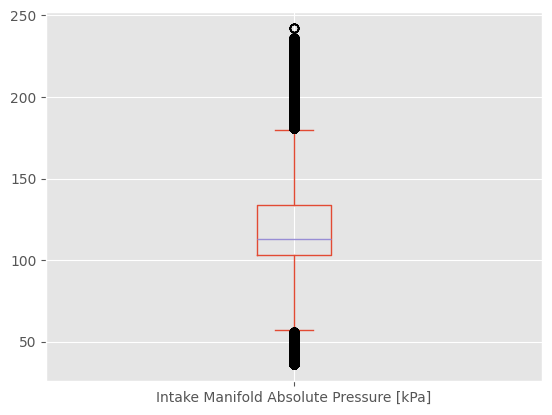

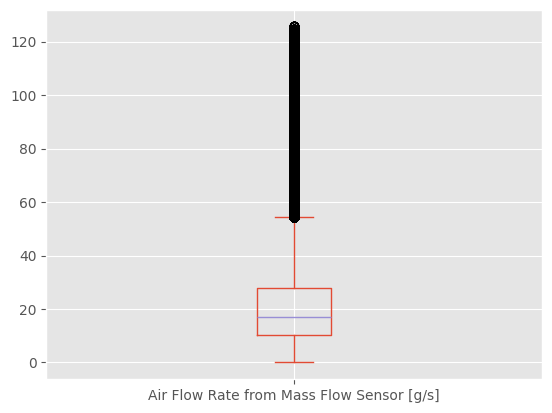

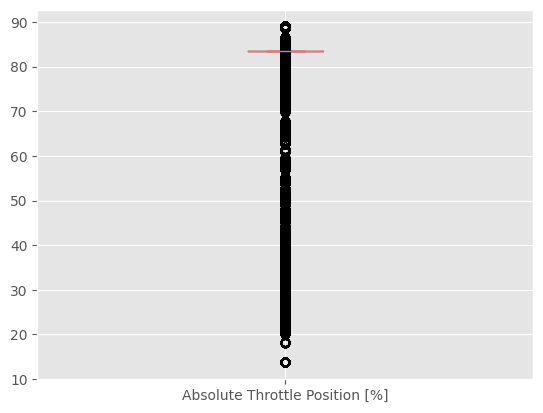

In [13]:
# # Box plots
data['Intake Manifold Absolute Pressure [kPa]'].plot(kind='box')
plt.show()
data['Air Flow Rate from Mass Flow Sensor [g/s]'].plot(kind='box')
plt.show()
data['Absolute Throttle Position [%]'].plot(kind='box')
plt.show()


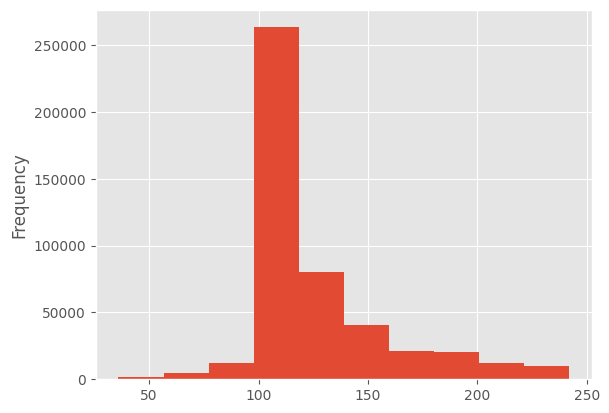

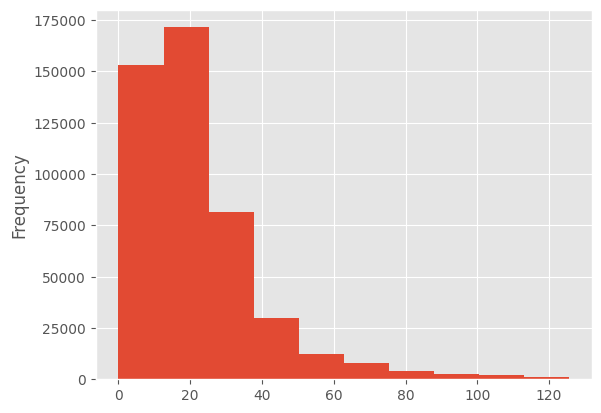

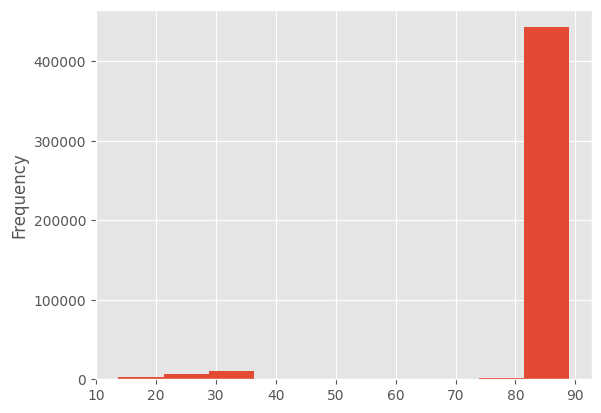

In [14]:
# Box plots
data['Intake Manifold Absolute Pressure [kPa]'].plot(kind='hist')
plt.show()
data['Air Flow Rate from Mass Flow Sensor [g/s]'].plot(kind='hist')
plt.show()
data['Absolute Throttle Position [%]'].plot(kind='hist')
plt.show()


In [15]:

x = data['Intake Manifold Absolute Pressure [kPa]']
y = data['Air Flow Rate from Mass Flow Sensor [g/s]']
z = data['Absolute Throttle Position [%]']

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x,y,z)
plt.show()

<Figure size 640x480 with 0 Axes>

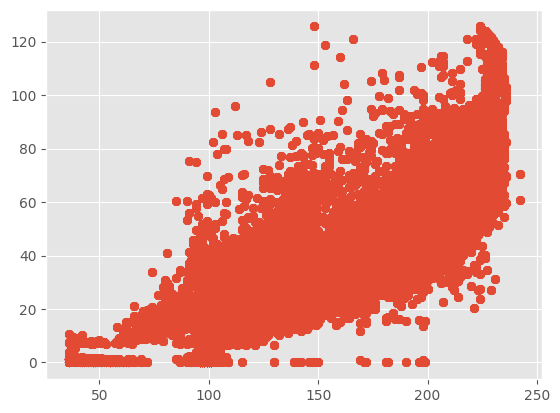

In [16]:

MAP = data['Intake Manifold Absolute Pressure [kPa]']
MAF = data['Air Flow Rate from Mass Flow Sensor [g/s]']
T_POS = data['Absolute Throttle Position [%]']
plt.scatter(MAP,MAF)


In [17]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],TripID
Time,1.0,0.025,-0.029,-0.047,-0.058,-0.064,-0.02,-0.096,-0.58,0.026,0.027,0.24
Engine Coolant Temperature [Â°C],0.025,1.0,0.19,0.2,0.3,0.017,0.17,-0.015,0.0097,-0.006,-0.0054,0.14
Intake Manifold Absolute Pressure [kPa],-0.029,0.19,1.0,0.66,0.67,-0.16,0.87,0.13,0.047,0.48,0.48,0.16
Engine RPM [RPM],-0.047,0.2,0.66,1.0,0.83,-0.5,0.79,-0.0039,0.032,0.35,0.35,0.18
Vehicle Speed Sensor [km/h],-0.058,0.3,0.67,0.83,1.0,-0.3,0.73,0.032,0.054,0.19,0.19,0.24
Intake Air Temperature [Â°C],-0.064,0.017,-0.16,-0.5,-0.3,1.0,-0.24,0.087,0.21,-0.1,-0.1,-0.017
Air Flow Rate from Mass Flow Sensor [g/s],-0.02,0.17,0.87,0.79,0.73,-0.24,1.0,0.0042,0.04,0.51,0.51,0.2
Absolute Throttle Position [%],-0.096,-0.015,0.13,-0.0039,0.032,0.087,0.0042,1.0,-0.02,0.03,0.024,-0.24
Ambient Air Temperature [Â°C],-0.58,0.0097,0.047,0.032,0.054,0.21,0.04,-0.02,1.0,-0.044,-0.044,0.23
Accelerator Pedal Position D [%],0.026,-0.006,0.48,0.35,0.19,-0.1,0.51,0.03,-0.044,1.0,0.99,0.02


In [19]:

      
model_df = data.drop(['Time', 'Engine Coolant Temperature [Â°C]', 'Engine RPM [RPM]',
       'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]','Absolute Throttle Position [%]',
       'Ambient Air Temperature [Â°C]', 'Accelerator Pedal Position D [%]',
       'Accelerator Pedal Position E [%]', 'TripID'], axis=1)
model_df.shape[1]

2

In [20]:
from sklearn.ensemble import IsolationForest

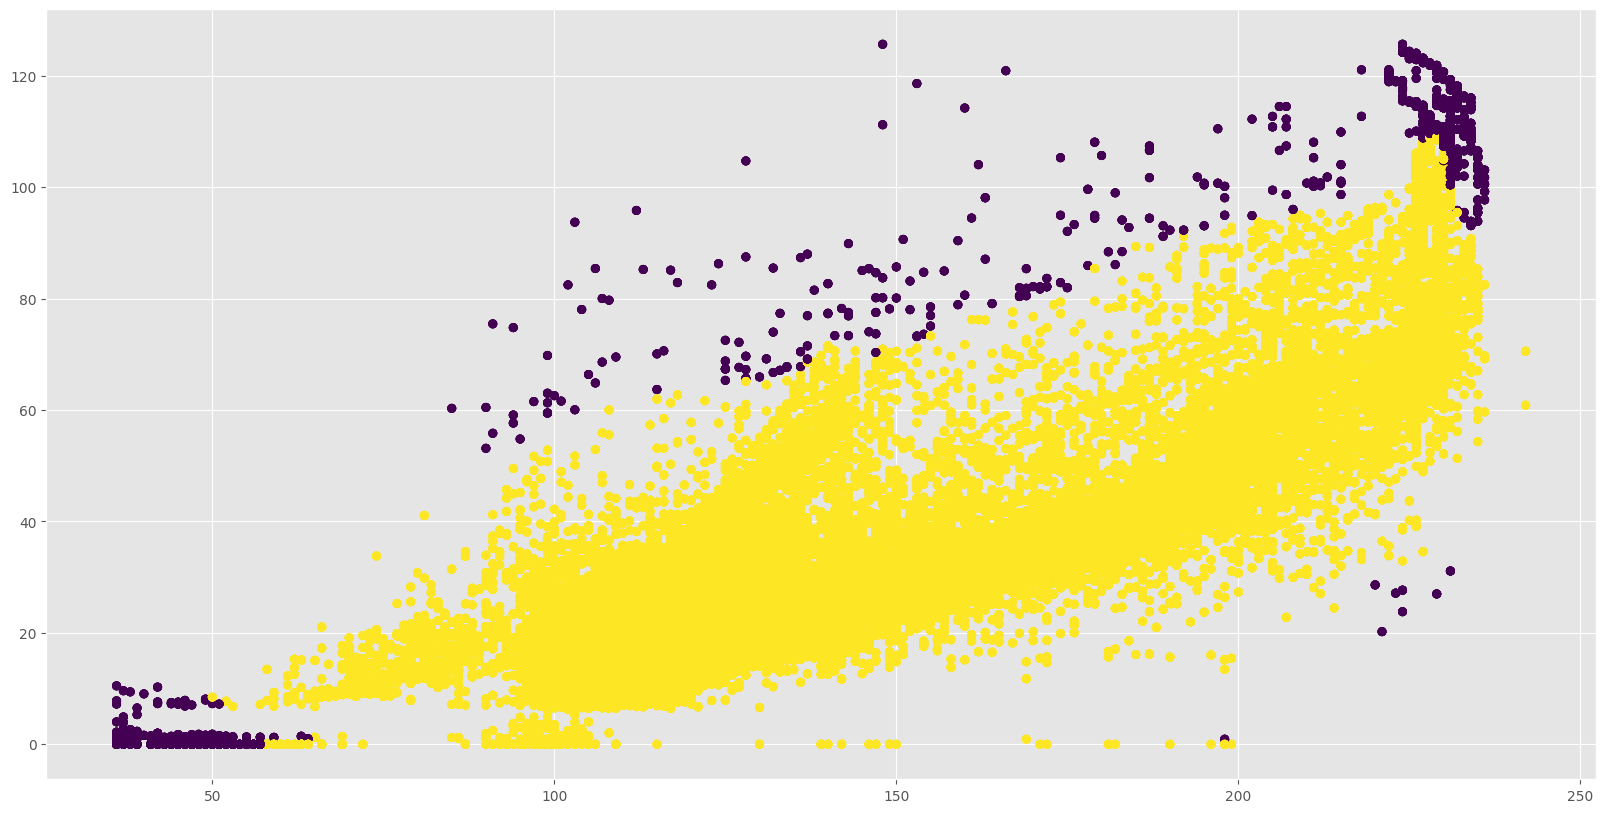

In [21]:
outlier_detect = IsolationForest(n_estimators=100, max_samples=1000, contamination=.01, max_features=model_df.shape[1])
outlier_detect.fit(model_df)
outliers_predicted = outlier_detect.predict(model_df)

#check the results
model_df['outlier'] = outliers_predicted
plt.figure(figsize = (20,10))
plt.scatter(model_df['Intake Manifold Absolute Pressure [kPa]'], model_df['Air Flow Rate from Mass Flow Sensor [g/s]'], c=model_df['outlier'])
plt.show()

In [22]:
import pickle
filename = 'anomaly_detection.sav'
pickle.dump(outlier_detect, open(filename,'wb'))

In [23]:
print(outliers_predicted)

[1 1 1 ... 1 1 1]
